<a href="https://colab.research.google.com/github/CristhianPozo1996/regresion_lineal/blob/main/Trabajo%20de%20Regresi%C3%B3n%20Lineal%20(6%20Escenarios).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#@title Copyright 2023 Google LLC. Haz doble clic aquí para ver la información de la licencia.
# Licenciado bajo la Licencia Apache, Versión 2.0 (la "Licencia");
# no puedes usar este archivo excepto en cumplimiento con la Licencia.
# Puedes obtener una copia de la Licencia en:
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# A menos que lo exija la ley aplicable o se haya acordado por escrito,
# el software distribuido bajo la Licencia se distribuye "TAL CUAL",
# SIN GARANTÍAS NI CONDICIONES DE NINGÚN TIPO, ya sean expresas o implícitas.
# Consulta la Licencia para conocer el lenguaje específico que rige
# los permisos y limitaciones bajo la Licencia.

# Colabs

El Curso Intensivo de Machine Learning utiliza Colaboratories (Colabs) para todos los ejercicios prácticos. Colab es la versión de Google de los Jupyter Notebook. Si quieres saber más sobre Colabs y cómo usarlos, visita Welcome to Colaboratory.

# Regresión Lineal
En este Colab usarás datos reales para entrenar un modelo que prediga cuánto costará un viaje en taxi en Chicago, Illinois.

## Objetivos de Aprendizaje
Al terminar este Colab, serás capaz de:

  * Importar archivos .csv a un DataFrame de pandas
  * Analizar un conjunto de datos usando herramientas de visualización de Python
  * Probar diferentes variables para crear un modelo de regresión lineal
  * Ajustar los hiperparámetros del modelo
  * Comparar resultados de entrenamiento usando el error cuadrático medio y curvas de pérdida

## Sobre los datos
Los datos para este ejercicio provienen del conjunto de datos de viajes en taxi de la Ciudad de Chicago. Usaremos una muestra que se enfoca en viajes realizados durante dos días específicos de mayo de 2022.

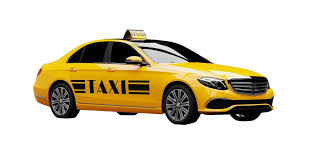

# Parte 1 - Configuración del ejercicio

---

## Cargar módulos necesarios

Este ejercicio utiliza varias librerías de Python que ayudan en el manejo de datos, tareas de machine learning y visualización de datos.

**Instrucciones**
1. Ejecuta la celda de código Instalar librerías necesarias (a continuación).
1. Ejecuta la celda de código Cargar dependencias (a continuación).

In [6]:
#@title Install required libraries

!pip install google-ml-edu==0.1.3 \
  keras~=3.8.0 \
  matplotlib~=3.10.0 \
  numpy~=2.0.0 \
  pandas~=2.2.0 \
  tensorflow~=2.18.0

print('\n\nAll requirements successfully installed.')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.6/615.6 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 111.3 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: keras
    Found existing installation: keras 3.10.0
    Uninstalling keras-3.10.0:
      Successfully uninstalled keras-3.10.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.18.1 whic

In [7]:
#@title Code - Load dependencies

# data
import numpy as np
import pandas as pd

# machine learning
import keras
import ml_edu.experiment
import ml_edu.results

# data visualization
import plotly.express as px

## Cargar dataset


El siguiente código carga los datos y crea un DataFrame de pandas.

Un DataFrame es como una hoja de cálculo con filas y columnas:

Filas = ejemplos individuales

Columnas = atributos de cada ejemplo

In [8]:
# @title
chicago_taxi_dataset = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")

## Actualizar el DataFrame

El siguiente código actualiza el DataFrame para usar solo columnas específicas.

La muestra mostrada te permite:

* Identificar las características del dataset

* Ver datos reales de algunos ejemplos

In [9]:
#@title Code - Read dataset

# Updates dataframe to use specific columns.
training_df = chicago_taxi_dataset.loc[:, ('TRIP_MILES', 'TRIP_SECONDS', 'FARE', 'COMPANY', 'PAYMENT_TYPE', 'TIP_RATE')]

print('Read dataset completed successfully.')
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.head(200)

Read dataset completed successfully.
Total number of rows: 31694




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
0,2.57,2341,31.99,Flash Cab,Mobile,6.3
1,1.18,1074,9.75,Flash Cab,Credit Card,27.9
2,1.29,1173,10.25,Sun Taxi,Cash,0.0
3,3.70,3360,23.75,Choice Taxi Association,Cash,0.0
4,1.15,1044,10.00,Flash Cab,Cash,0.0
...,...,...,...,...,...,...
195,1.13,821,9.00,Blue Ribbon Taxi Association,Mobile,22.9
196,0.57,414,6.00,Flash Cab,Cash,0.0
197,1.22,886,9.00,City Service,Cash,0.0
198,1.68,1219,9.00,Sun Taxi,Mobile,23.0


# Part 2 - Dataset Exploration


---

## Ver estadísticas del dataset

Una parte importante de los proyectos de machine learning es conocer tus datos. En este paso, usarás el método ``DataFrame.describe`` para ver estadísticas descriptivas del dataset y responder algunas preguntas clave.

**Instrucciones**
1. Ejecuta la celda de código Ver estadísticas del dataset.
1. Revisa los resultados y responde:
  * ¿Cuál es la tarifa máxima?
  * ¿Cuál es la distancia promedio de todos los viajes?
  * ¿Cuántas empresas de taxi hay en el dataset?
  * ¿Cuál es el método de pago más frecuente?
  * ¿Hay características con datos faltantes?
1. Ejecuta la celda **Ver respuestas sobre estadísticas del dataset** para verificar tus respuestas.

Los valores `NaN` (no es un número) aparecen cuando:

* Un cálculo no se puede realizar

* Hay información faltante

* Las características categóricas (como `PAYMENT_TYPE` y `COMPANY`) no tienen sentido en cálculos numéricos como promedios

In [10]:
#@title Code - View dataset statistics

print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.describe(include='all')

Total number of rows: 31694




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
count,31694.000000,31694.000000,31694.000000,31694,31694,31694.000000
unique,NaN,NaN,NaN,31,7,NaN
top,NaN,NaN,NaN,Flash Cab,Credit Card,NaN
freq,NaN,NaN,NaN,7887,14142,NaN
mean,8.289463,1319.796397,23.905210,NaN,NaN,12.965785
std,7.265672,928.932873,16.970022,NaN,NaN,15.517765
min,0.500000,60.000000,3.250000,NaN,NaN,0.000000
25%,1.720000,548.000000,9.000000,NaN,NaN,0.000000
50%,5.920000,1081.000000,18.750000,NaN,NaN,12.200000
75%,14.500000,1888.000000,38.750000,NaN,NaN,20.800000


In [11]:
#@title Double-click or run to view answers about dataset statistics

answer = '''
What is the maximum fare? 				              Answer: $159.25
What is the mean distance across all trips? 		Answer: 8.2895 miles
How many cab companies are in the dataset? 		  Answer: 31
What is the most frequent payment type? 		    Answer: Credit Card
Are any features missing data? 				          Answer: No
'''

# You should be able to find the answers to the questions about the dataset
# by inspecting the table output after running the DataFrame describe method.
#
# Run this code cell to verify your answers.

# What is the maximum fare?
max_fare = training_df['FARE'].max()
print("What is the maximum fare? 				Answer: ${fare:.2f}".format(fare = max_fare))

# What is the mean distance across all trips?
mean_distance = training_df['TRIP_MILES'].mean()
print("What is the mean distance across all trips? 		Answer: {mean:.4f} miles".format(mean = mean_distance))

# How many cab companies are in the dataset?
num_unique_companies =  training_df['COMPANY'].nunique()
print("How many cab companies are in the dataset? 		Answer: {number}".format(number = num_unique_companies))

# What is the most frequent payment type?
most_freq_payment_type = training_df['PAYMENT_TYPE'].value_counts().idxmax()
print("What is the most frequent payment type? 		Answer: {type}".format(type = most_freq_payment_type))

# Are any features missing data?
missing_values = training_df.isnull().sum().sum()
print("Are any features missing data? 				Answer:", "No" if missing_values == 0 else "Yes")

What is the maximum fare? 				Answer: $159.25
What is the mean distance across all trips? 		Answer: 8.2895 miles
How many cab companies are in the dataset? 		Answer: 31
What is the most frequent payment type? 		Answer: Credit Card
Are any features missing data? 				Answer: No


## Generar matriz de correlación

Determina qué [caracteristicas](https://developers.google.com/machine-learning/glossary/#feature) se relacionan con la [etiqueta](https://developers.google.com/machine-learning/glossary/#label). La experiencia sugiere que la tarifa depende de la distancia y duración, pero ¿cómo medirlo?

La matriz de correlación muestra estas relaciones:

  * **`1.0`**: correlación positiva perfecta
  * **`-1.0`**: correlación negativa perfecta
  * **`0.0`**: sin correlación lineal; las 2 columnas [no tienen correlación lineal](https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg).

Mayor valor absoluto = mayor poder predictivo.

**Instrucciones**

1. Revisa y ejecuta la celda **Ver matriz de correlación**.

1. **Responde**:
  * ¿Qué característica se correlaciona MÁS con la tarifa?
  * ¿Qué característica se correlaciona MENOS con la tarifa?


In [12]:
#@title Code - View correlation matrix
training_df.corr(numeric_only = True)

,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE
TRIP_MILES,1.000000,0.800855,0.975344,-0.049594
TRIP_SECONDS,0.800855,1.000000,0.830292,-0.084294
FARE,0.975344,0.830292,1.000000,-0.070979
TIP_RATE,-0.049594,-0.084294,-0.070979,1.000000


In [13]:
#@title Double-click to view answers about the correlation matrix

# Which feature correlates most strongly to the label FARE?
# ---------------------------------------------------------
answer = '''
The feature with the strongest correlation to the FARE is TRIP_MILES.
As you might expect, TRIP_MILES looks like a good feature to start with to train
the model. Also, notice that the feature TRIP_SECONDS has a strong correlation
with fare too.
'''
print(answer)


# Which feature correlates least strongly to the label FARE?
# -----------------------------------------------------------
answer = '''The feature with the weakest correlation to the FARE is TIP_RATE.'''
print(answer)


The feature with the strongest correlation to the FARE is TRIP_MILES.
As you might expect, TRIP_MILES looks like a good feature to start with to train
the model. Also, notice that the feature TRIP_SECONDS has a strong correlation
with fare too.

The feature with the weakest correlation to the FARE is TIP_RATE.


## Visualizar relaciones en el dataset

Para analizar relaciones entre características, usa un **pair plot**: una cuadrícula de gráficos que muestra las relaciones entre todos los pares de características.

**Instrucción**
1. Ejecuta la celda **Ver pair plot**.

In [14]:
#@title Code - View pairplot
px.scatter_matrix(training_df, dimensions=["FARE", "TRIP_MILES", "TRIP_SECONDS"])

# Parte 3 - Entrenar un modelo


---

## Definir funciones para construir y entrenar un modelo

El código necesario para construir y entrenar tu modelo está en la celda **Define ML functions**. Si quieres explorar el código, expande la celda y échale un vistazo.

**Instrucción**
1. Ejecuta la celda **Define ML functions**.

In [15]:
#@title Code - Define ML functions

def create_model(
    settings: ml_edu.experiment.ExperimentSettings,
    metrics: list[keras.metrics.Metric],
) -> keras.Model:
  """Create and compile a simple linear regression model."""
  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  inputs = {name: keras.Input(shape=(1,), name=name) for name in settings.input_features}
  concatenated_inputs = keras.layers.Concatenate()(list(inputs.values()))
  outputs = keras.layers.Dense(units=1)(concatenated_inputs)
  model = keras.Model(inputs=inputs, outputs=outputs)

  # Compile the model topography into code that Keras can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=settings.learning_rate),
                loss="mean_squared_error",
                metrics=metrics)

  return model


def train_model(
    experiment_name: str,
    model: keras.Model,
    dataset: pd.DataFrame,
    label_name: str,
    settings: ml_edu.experiment.ExperimentSettings,
) -> ml_edu.experiment.Experiment:
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs.
  features = {name: dataset[name].values for name in settings.input_features}
  label = dataset[label_name].values
  history = model.fit(x=features,
                      y=label,
                      batch_size=settings.batch_size,
                      epochs=settings.number_epochs)

  return ml_edu.experiment.Experiment(
      name=experiment_name,
      settings=settings,
      model=model,
      epochs=history.epoch,
      metrics_history=pd.DataFrame(history.history),
  )

print("SUCCESS: defining linear regression functions complete.")

SUCCESS: defining linear regression functions complete.


## Entrenar modelo con una característica

Entrena un modelo para predecir el costo de la tarifa usando una sola característica. Como `TRIP_MILES` (distancia) se correlaciona más con ``FARE``, so let's start with `TRIP_MILES` usémosla para el primer experimento.

**Instrucciones**

1. Ejecuta la celda **Experiment 1**.
1. Revisa los resultados
1. Responde:
  * ¿Cuántas épocas tomó converger al modelo final?
  * ¿Qué tan bien se ajusta el modelo a los datos?

El RMSE (error cuadrático medio) muestra cuánto se desvían en dólares en promedio las predicciones de los valores reales.

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1088.1931 - rmse: 32.9677
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 649.1053 - rmse: 25.4611
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 342.9958 - rmse: 18.4946
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 134.9547 - rmse: 11.5780
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 30.4606 - rmse: 5.4934
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.2200 - rmse: 3.8967
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.9178 - rmse: 3.7236
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.1834 - rmse: 3.7621
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.2773 - rmse: 3.6380
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.0389 - rmse: 3.7426
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.7648 - rmse: 3.9553
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.4343 - rmse:

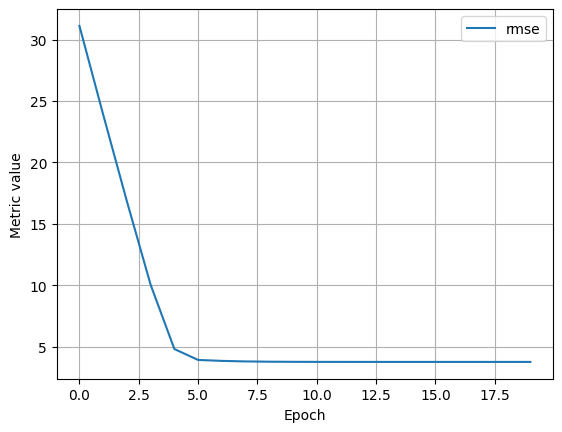

In [16]:
#@title Code - Experiment 1

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

In [17]:
#@title Double-click to view answers for training model with one feature

# How many epochs did it take to converge on the final model?
# -----------------------------------------------------------------------------
answer = """
Use the loss curve to see where the loss begins to level off during training.

With this set of hyperparameters:

  learning_rate = 0.001
  epochs = 20
  batch_size = 50

it takes about 5 epochs for the training run to converge to the final model.
"""
print(answer)

# How well does the model fit the sample data?
# -----------------------------------------------------------------------------
answer = '''
It appears from the model plot that the model fits the sample data fairly well.
'''
print(answer)


Use the loss curve to see where the loss begins to level off during training.

With this set of hyperparameters:

  learning_rate = 0.001
  epochs = 20
  batch_size = 50

it takes about 5 epochs for the training run to converge to the final model.


It appears from the model plot that the model fits the sample data fairly well.



Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 448693.9375 - rmse: 642.7056
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 331565.2500 - rmse: 575.4109
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 325257.7812 - rmse: 568.3406
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 335545.3750 - rmse: 578.8475
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 328649.3125 - rmse: 569.8259
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 328509.6250 - rmse: 572.0397
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 340147.7500 - rmse: 581.9647
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 331686.8438 - rmse: 574.5627
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 327006.2500 - rmse: 571.5349
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 312349.3750 - rmse: 557.6768
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 350385.7812 - rmse: 589.5806
Epoch 12/20
634/634

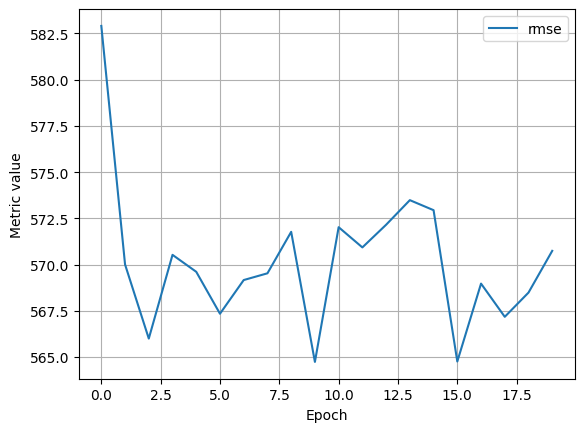

In [18]:
#@title Code - Experimento 1 (Learn_Rate_MAX)

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 100.0,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2062.9780 - rmse: 45.4186
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2033.6570 - rmse: 45.0917
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2043.0687 - rmse: 45.1996
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2091.3853 - rmse: 45.7288
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2067.9790 - rmse: 45.4739
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2048.7473 - rmse: 45.2622
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2035.3684 - rmse: 45.1144
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2039.1279 - rmse: 45.1552
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2029.1171 - rmse: 45.0400
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2012.0693 - rmse: 44.8546
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2020.8601 - rmse: 44.9528
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


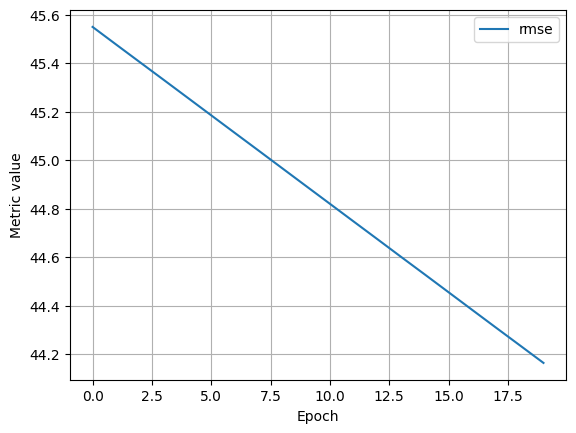

In [19]:
#@title Code - Experimento 2 (Learn_Rate_MIN)

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.00001,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1141.9523 - rmse: 33.7743
Epoch 2/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 704.3026 - rmse: 26.5191
Epoch 3/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 369.1161 - rmse: 19.1888
Epoch 4/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 150.8153 - rmse: 12.2475
Epoch 5/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 37.1965 - rmse: 6.0692
Epoch 6/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.6655 - rmse: 3.9486
Epoch 7/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.3058 - rmse: 3.7793
Epoch 8/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 15.3887 - rmse: 3.9182
Epoch 9/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13.4587 - rmse: 3.6514
Epoch 10/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.5891 - rmse: 3.6829
Epoch 11/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.1674 - rmse: 3.7548
Epoch 12/50
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.0736 - rmse:

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


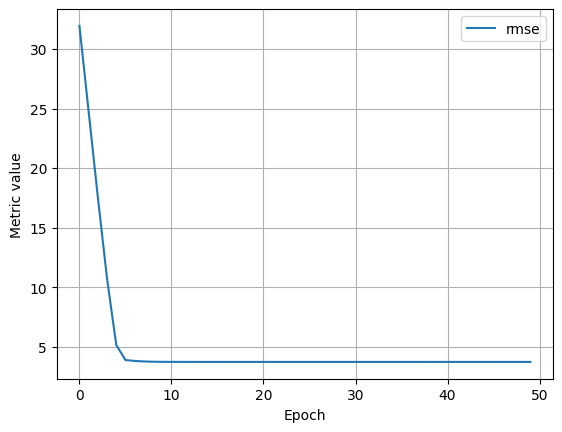

In [20]:
#@title Code - Experimento 3 (Number_Epochs_MAX)

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 50,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/5
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 297.5199 - rmse: 17.2197
Epoch 2/5
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 105.3349 - rmse: 10.2303
Epoch 3/5
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24.5053 - rmse: 4.9433
Epoch 4/5
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18.5615 - rmse: 4.3004
Epoch 5/5
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17.0484 - rmse: 4.1234
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


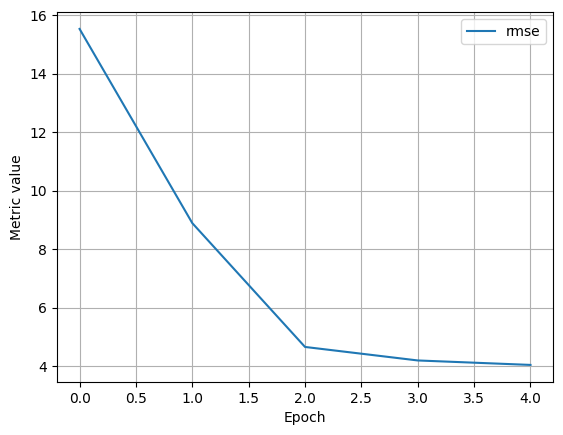

In [21]:
#@title Code - Experimento 4 (Number_Epochs_MIN)

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 5,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 854.3661 - rmse: 29.2264
Epoch 2/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 716.2350 - rmse: 26.7609
Epoch 3/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 588.5887 - rmse: 24.2586
Epoch 4/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 480.8770 - rmse: 21.9259
Epoch 5/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 384.0812 - rmse: 19.5944
Epoch 6/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 292.7165 - rmse: 17.1059
Epoch 7/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 216.1794 - rmse: 14.6997
Epoch 8/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 153.7650 - rmse: 12.3968
Epoch 9/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 103.2414 - rmse: 10.1535
Epoch 10/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64.4591 - rmse: 8.0195
Epoch 11/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.6891 - rmse: 5.8875
Epoch 12/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.755

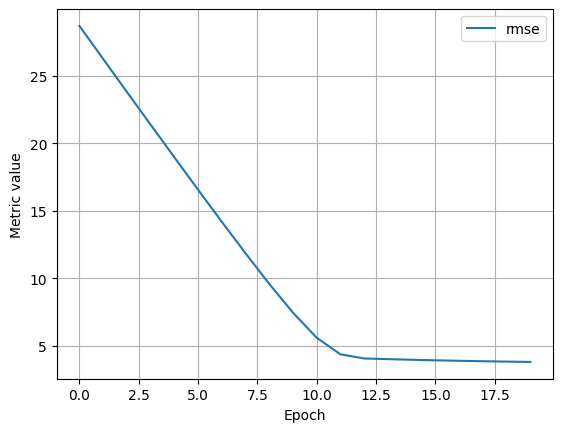

In [23]:
#@title Code - Experimento 5 (Batch_Size_MAX)

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 150,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 108.3709 - rmse: 10.0860
Epoch 2/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 18.0346 - rmse: 4.2369
Epoch 3/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 13.8265 - rmse: 3.7101
Epoch 4/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 14.5089 - rmse: 3.8010
Epoch 5/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 12.9550 - rmse: 3.5682
Epoch 6/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 14.2270 - rmse: 3.7695
Epoch 7/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 14.9006 - rmse: 3.8434
Epoch 8/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 13.0389 - rmse: 3.6067
Epoch 9/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 14.9910 - rmse: 3.8674
Epoch 10/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 14.8107 - rmse: 3.8402
Epoch 11/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 15.7164 - rmse: 3.9589
Epoch 12/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss

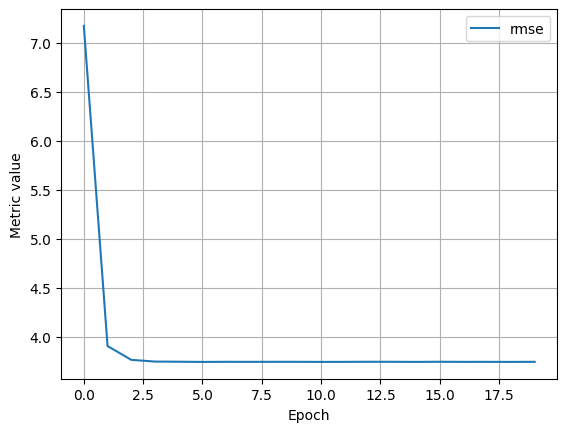

In [24]:
#@title Code - Experimento 6 (Batch_Size_MIN)

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 10,
    input_features = ['TRIP_MILES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')